In [1]:
import numpy as np
import pandas as pd

#import scipy
import matplotlib.pyplot as plt
#import os
#from scipy import io

import seaborn as sns

#from scipy import stats
#from scipy.stats import zscore
#from sklearn.preprocessing import StandardScaler
#from sklearn import preprocessing
#from sklearn.model_selection import train_test_split

#from sklearn.cluster import KMeans
#from sklearn import preprocessing

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Read Data
df_cdhdr = pd.read_excel('../Data1/CDHDR.XLSX')

In [4]:
df_cdhdr.head(4)

,OBJECTCLAS,OBJECTID,CHANGENR,USERNAME,UDATE,UTIME,TCODE,PLANCHNGNR,ACT_CHNGNO,WAS_PLANND,CHANGE_IND,LANGU,VERSION
0,ADRESSE,SODI0000026767,63527,G3,2021-02-21,09:40:54,NaN,NaN,NaN,NaN,U,DE,0
1,COND_A,0000007274,54767,A4,2021-01-25,13:59:46,VK32,NaN,NaN,NaN,U,DE,0
2,COND_A,0000007274,54878,A4,2021-01-25,14:10:36,VK32,NaN,NaN,NaN,U,DE,0
3,COND_A,0000007274,56303,A4,2021-01-25,15:25:28,VK32,NaN,NaN,NaN,U,DE,0


In [6]:
df_cdpos = pd.read_excel('../Data1/CDPOS.XLSX')

In [7]:
df_cdpos.tail(4)

,OBJECTCLAS,OBJECTID,CHANGENR,TABNAME,TABKEY,FNAME,CHNGIND,TEXT_CASE,UNIT_OLD,UNIT_NEW,CUKY_OLD,CUKY_NEW,VALUE_NEW,VALUE_OLD
35427,STUE_V,934M0000023220210125R 01 20210125,54596,CSBOM,M00000232,CSVKZ,U,1,NaN,NaN,NaN,NaN,X,NaN
35428,STUE_V,934M0000023320210125R 01 20210125,54599,CSBOM,M00000233,CSVKZ,U,1,NaN,NaN,NaN,NaN,X,NaN
35429,STUE_V,934M0000023420210125R 01 20210125,54602,CSBOM,M00000234,CSVKZ,U,1,NaN,NaN,NaN,NaN,X,NaN
35430,STUE_V,934M0000023620210125R 01 20210125,54606,CSBOM,M00000236,CSVKZ,U,1,NaN,NaN,NaN,NaN,X,NaN


In [8]:
print(df_cdhdr.shape)
print(df_cdpos.shape)

(12732, 13)
(35431, 14)


In [9]:
df_ch = pd.merge(df_cdpos, df_cdhdr, how='left', on='CHANGENR')

In [10]:
#sanity check (first number should be the higher one from before, second should be addition of the right numbers)
df_ch.shape

(35431, 26)

In [11]:
df_ch.head(5)

,OBJECTCLAS_x,OBJECTID_x,CHANGENR,TABNAME,TABKEY,FNAME,CHNGIND,TEXT_CASE,UNIT_OLD,UNIT_NEW,CUKY_OLD,CUKY_NEW,VALUE_NEW,VALUE_OLD,OBJECTCLAS_y,OBJECTID_y,USERNAME,UDATE,UTIME,TCODE,PLANCHNGNR,ACT_CHNGNO,WAS_PLANND,CHANGE_IND,LANGU,VERSION
0,ADRESSE,SODI0000026767,63527,ADRC,934000002676700010101,KEY,I,1,NaN,NaN,NaN,NaN,NaN,NaN,ADRESSE,SODI0000026767,G3,2021-02-21,09:40:54,NaN,NaN,NaN,NaN,U,DE,0
1,COND_A,0000007274,54767,KONPAE,934000000727401,KBETR,U,1,NaN,NaN,EUR,EUR,5.80,3.90,COND_A,0000007274,A4,2021-01-25,13:59:46,VK32,NaN,NaN,NaN,U,DE,0
2,COND_A,0000007274,54878,KONPAE,934000000727401,KBETR,U,1,NaN,NaN,EUR,EUR,6.80,5.80,COND_A,0000007274,A4,2021-01-25,14:10:36,VK32,NaN,NaN,NaN,U,DE,0
3,COND_A,0000007274,56303,KONPAE,934000000727401,KBETR,U,1,NaN,NaN,EUR,EUR,5.50,6.80,COND_A,0000007274,A4,2021-01-25,15:25:28,VK32,NaN,NaN,NaN,U,DE,0
4,COND_A,0000007274,56907,KONPAE,934000000727401,KBETR,U,1,NaN,NaN,EUR,EUR,4.85,5.50,COND_A,0000007274,A4,2021-01-28,14:02:24,VK32,NaN,NaN,NaN,U,DE,0


<Axes: >

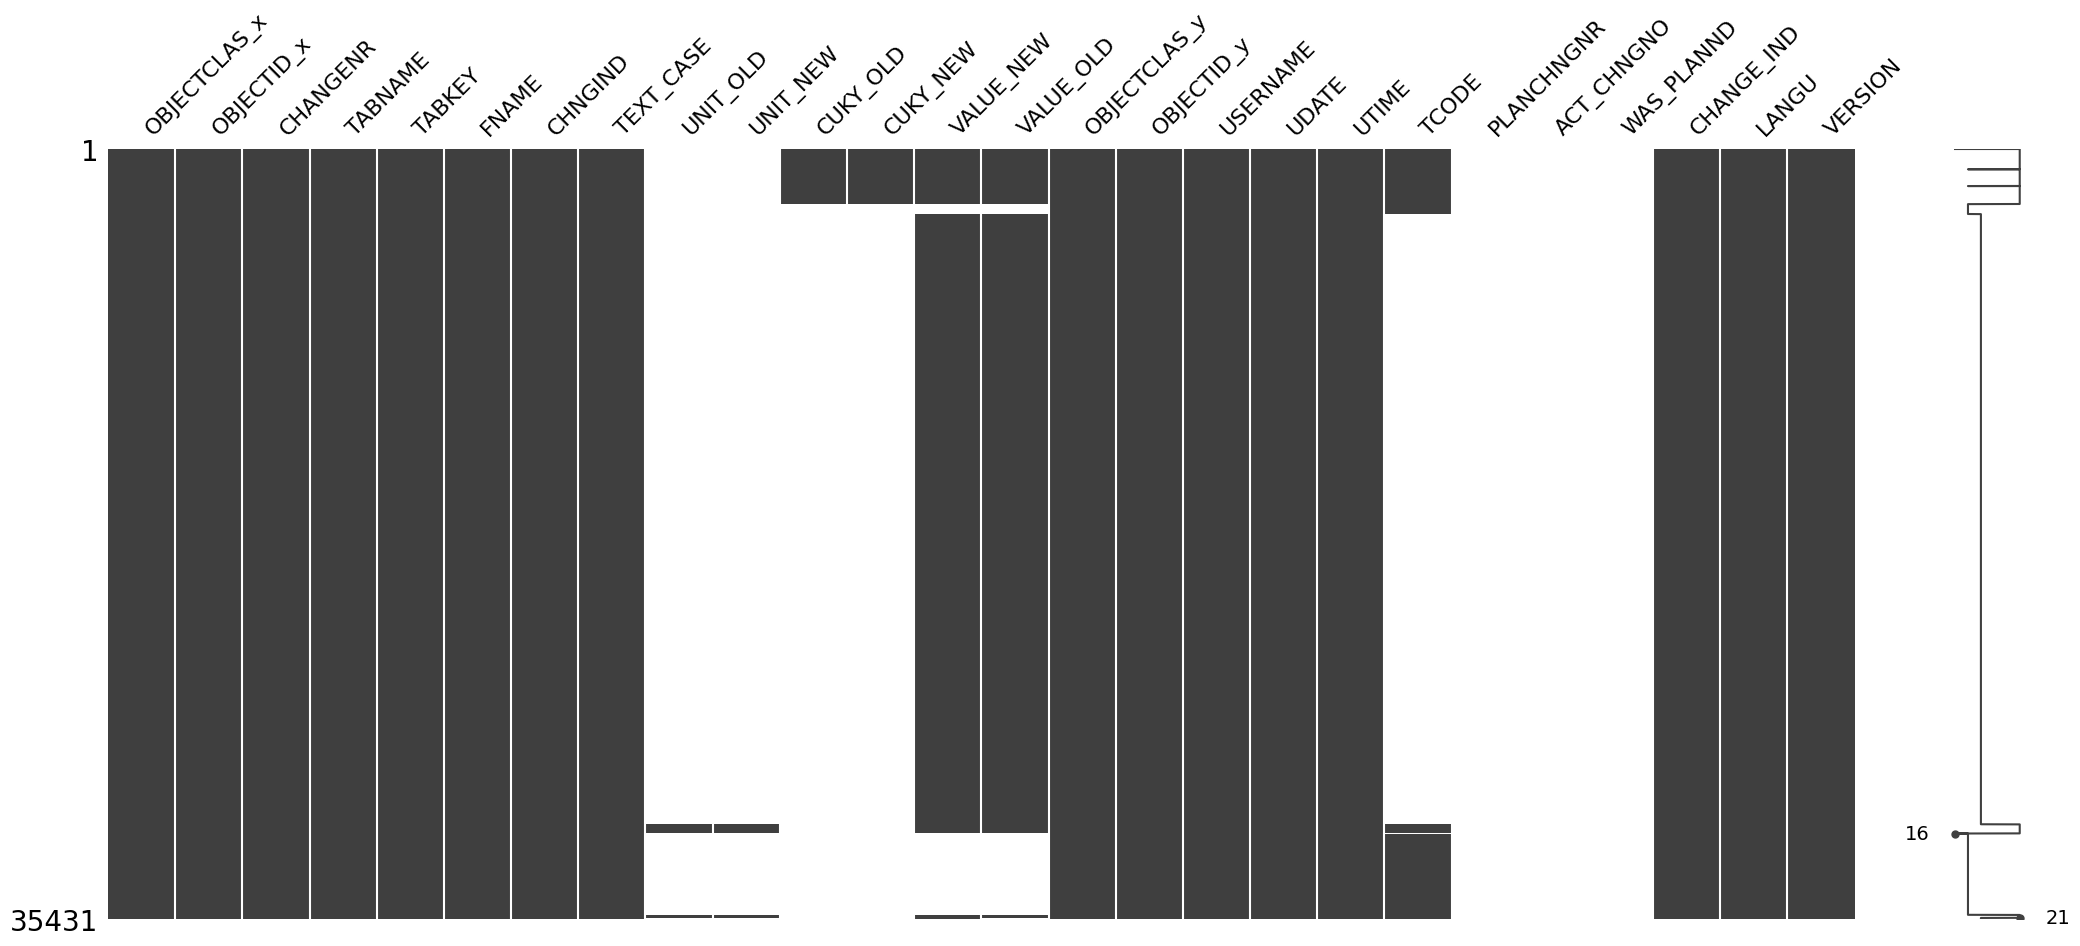

In [13]:
import missingno as msno
%matplotlib inline
msno.matrix(df_ch)

# Data Cleansing

## initial cleaning

In [14]:
df = df_ch.copy()
print(df.shape)

(35431, 26)


In [15]:

# Spalten die nur NAN enthalten entfernen
df = df.dropna(axis=1, how='all')


# Spalten die ausschließlich XY Werte enthalten (0 / X / 1 / etc.) dropen
df = df.loc[:, (df.astype(str) != 0).any(axis=0)]
df = df.loc[:, (df.astype(str) != '0,0').any(axis=0)]
df = df.loc[:, (df.astype(str) != '0,00').any(axis=0)]
df = df.loc[:, (df.astype(str) != '0,000').any(axis=0)]
df = df.loc[:, (df.astype(str) != 'X').any(axis=0)]
df = df.loc[:, (df.astype(str) != '1').any(axis=0)]



#spaletn entfernen die immer die selben Werte enthalten
keep_columns = [col for col in df.columns if len(df[col].unique()) > 1]
df = df[keep_columns].copy()


#print(len(df_io.index))
print(df.shape)

(35431, 21)


<Axes: >

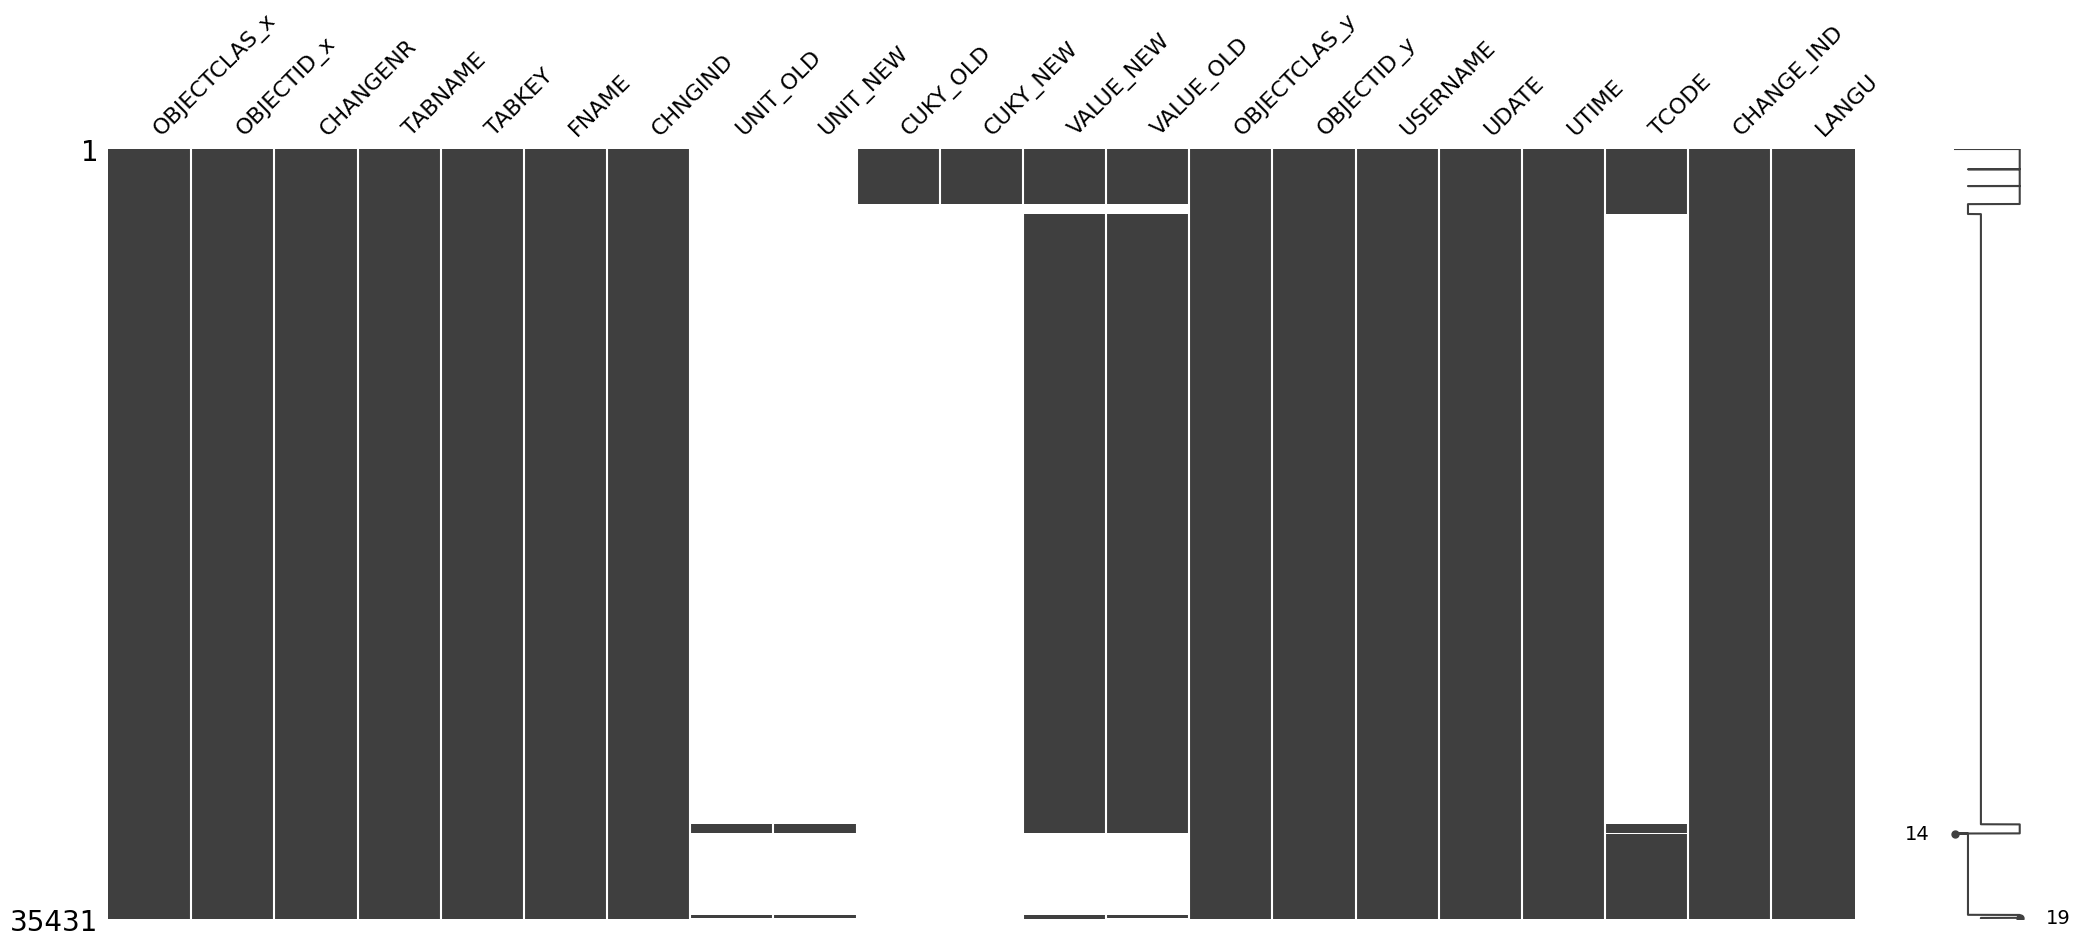

In [16]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

In [17]:
df.head(4)

,OBJECTCLAS_x,OBJECTID_x,CHANGENR,TABNAME,TABKEY,FNAME,CHNGIND,UNIT_OLD,UNIT_NEW,CUKY_OLD,CUKY_NEW,VALUE_NEW,VALUE_OLD,OBJECTCLAS_y,OBJECTID_y,USERNAME,UDATE,UTIME,TCODE,CHANGE_IND,LANGU
0,ADRESSE,SODI0000026767,63527,ADRC,934000002676700010101,KEY,I,NaN,NaN,NaN,NaN,NaN,NaN,ADRESSE,SODI0000026767,G3,2021-02-21,09:40:54,NaN,U,DE
1,COND_A,0000007274,54767,KONPAE,934000000727401,KBETR,U,NaN,NaN,EUR,EUR,5.80,3.90,COND_A,0000007274,A4,2021-01-25,13:59:46,VK32,U,DE
2,COND_A,0000007274,54878,KONPAE,934000000727401,KBETR,U,NaN,NaN,EUR,EUR,6.80,5.80,COND_A,0000007274,A4,2021-01-25,14:10:36,VK32,U,DE
3,COND_A,0000007274,56303,KONPAE,934000000727401,KBETR,U,NaN,NaN,EUR,EUR,5.50,6.80,COND_A,0000007274,A4,2021-01-25,15:25:28,VK32,U,DE


In [18]:
# have lost somhow pretty much of the data due to the sparcity and empty cols

In [19]:
#lets add the time and date column
#as Timestamp
df['UDATE'] = df_ch['UDATE'].copy()
#df['TMSTMP'] = pd.to_datetime(df['CPUTM'].astype(str)+' '+df['CPUDT'].astype(str))
df['TMSTMP'] = pd.to_datetime(df['UDATE'].astype(str) + df['UTIME'].astype(str) , format='%Y-%m-%d%H:%M:%S')

In [20]:
df.head(4)

,OBJECTCLAS_x,OBJECTID_x,CHANGENR,TABNAME,TABKEY,FNAME,CHNGIND,UNIT_OLD,UNIT_NEW,CUKY_OLD,CUKY_NEW,VALUE_NEW,VALUE_OLD,OBJECTCLAS_y,OBJECTID_y,USERNAME,UDATE,UTIME,TCODE,CHANGE_IND,LANGU,TMSTMP
0,ADRESSE,SODI0000026767,63527,ADRC,934000002676700010101,KEY,I,NaN,NaN,NaN,NaN,NaN,NaN,ADRESSE,SODI0000026767,G3,2021-02-21,09:40:54,NaN,U,DE,2021-02-21 09:40:54
1,COND_A,0000007274,54767,KONPAE,934000000727401,KBETR,U,NaN,NaN,EUR,EUR,5.80,3.90,COND_A,0000007274,A4,2021-01-25,13:59:46,VK32,U,DE,2021-01-25 13:59:46
2,COND_A,0000007274,54878,KONPAE,934000000727401,KBETR,U,NaN,NaN,EUR,EUR,6.80,5.80,COND_A,0000007274,A4,2021-01-25,14:10:36,VK32,U,DE,2021-01-25 14:10:36
3,COND_A,0000007274,56303,KONPAE,934000000727401,KBETR,U,NaN,NaN,EUR,EUR,5.50,6.80,COND_A,0000007274,A4,2021-01-25,15:25:28,VK32,U,DE,2021-01-25 15:25:28


In [21]:
#sanity check
df.shape

(35431, 22)

## data types correction

In [22]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
OBJECTCLAS_x,35431,9,LIEFERUNG,28080,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OBJECTID_x,35431,6497,ZSIM_MENU_W_DST_STD,468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHANGENR,35431.0,NaN,NaN,NaN,58436.785386,50796.0,56152.0,58578.0,61043.0,63527.0,3130.53842
TABNAME,35431,12,VBUK,16848,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TABKEY,35431,8810,934000000881201,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FNAME,35431,12,FKDAT,5616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHNGIND,35431,3,U,31220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UNIT_OLD,503,2,ST,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UNIT_NEW,503,2,ST,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUKY_OLD,2587,1,EUR,2587,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.sample(10)

,OBJECTCLAS_x,OBJECTID_x,CHANGENR,TABNAME,TABKEY,FNAME,CHNGIND,UNIT_OLD,UNIT_NEW,CUKY_OLD,CUKY_NEW,VALUE_NEW,VALUE_OLD,OBJECTCLAS_y,OBJECTID_y,USERNAME,UDATE,UTIME,TCODE,CHANGE_IND,LANGU,TMSTMP
22475,LIEFERUNG,0080003895,60846,VBUK,9340080003895,WBSTK,U,NaN,NaN,NaN,NaN,C,A,LIEFERUNG,0080003895,ADMIN1,2021-02-01,15:29:46,NaN,U,EN,2021-02-01 15:29:46
9080,LIEFERUNG,0080001216,56685,VBUK,9340080001216,WBSTK,U,NaN,NaN,NaN,NaN,C,A,LIEFERUNG,0080001216,ADMIN1,2021-01-25,15:38:26,NaN,U,EN,2021-01-25 15:38:26
9920,LIEFERUNG,0080001384,57037,VBUK,9340080001384,WBSTK,U,NaN,NaN,NaN,NaN,C,A,LIEFERUNG,0080001384,ADMIN1,2021-01-28,14:17:31,NaN,U,EN,2021-01-28 14:17:31
1824,COND_A,0000008777,60303,KONPAE,934000000877701,KBETR,U,NaN,NaN,EUR,EUR,4.75,4.66,COND_A,0000008777,C4,2021-02-01,15:05:50,VK32,U,EN,2021-02-01 15:05:50
28839,LIEFERUNG,0080005168,62788,VBUK,9340080005168,KOSTK,U,NaN,NaN,NaN,NaN,C,A,LIEFERUNG,0080005168,ADMIN1,2021-02-04,15:20:24,NaN,U,EN,2021-02-04 15:20:24
12339,LIEFERUNG,0080001868,57734,VBUK,9340080001868,KOSTK,U,NaN,NaN,NaN,NaN,C,A,LIEFERUNG,0080001868,ADMIN1,2021-01-28,14:52:43,NaN,U,EN,2021-01-28 14:52:43
5506,LIEFERUNG,0080000502,55638,LIKP,9340080000502,FKDAT,U,NaN,NaN,NaN,NaN,20210125,20210126,LIEFERUNG,0080000502,ADMIN1,2021-01-25,14:56:33,NaN,U,EN,2021-01-25 14:56:33
24579,LIEFERUNG,0080004316,61554,VBUK,9340080004316,KOSTK,U,NaN,NaN,NaN,NaN,C,A,LIEFERUNG,0080004316,ADMIN1,2021-02-04,14:21:00,NaN,U,EN,2021-02-04 14:21:00
3374,LIEFERUNG,0080000075,54981,VBUK,9340080000075,KOSTK,U,NaN,NaN,NaN,NaN,C,A,LIEFERUNG,0080000075,ADMIN1,2021-01-25,14:24:16,NaN,U,EN,2021-01-25 14:24:16
28305,LIEFERUNG,0080005061,62639,VBUK,9340080005061,WBSTK,U,NaN,NaN,NaN,NaN,C,A,LIEFERUNG,0080005061,ADMIN1,2021-02-04,15:09:53,NaN,U,EN,2021-02-04 15:09:53


In [25]:
#2 Del
#ZEILE LINE_ID CPUTM_MKPF
#df = df.drop(['BUZEI'], axis=1)

In [26]:
cont_Cols = ['CHANGENR']

#to many we create this list later by computation
cat_Cols = [ ]

num_Cols = []

dat_Cols = ['UDATE', 'UTIME', 'TMSTMP']



In [27]:
list1 = df.columns.to_list()
print(list1)

#we already have these cols in num or cont or dat so lets make a list and remove them from all other than we have cat cols
unw = num_Cols + dat_Cols + cont_Cols

#cat cols are all cols - the cols we already defined as num / dat / cat
cat_Cols = [x for x in list1 if x not in unw]

['OBJECTCLAS_x', 'OBJECTID_x', 'CHANGENR', 'TABNAME', 'TABKEY', 'FNAME', 'CHNGIND', 'UNIT_OLD', 'UNIT_NEW', 'CUKY_OLD', 'CUKY_NEW', 'VALUE_NEW', 'VALUE_OLD', 'OBJECTCLAS_y', 'OBJECTID_y', 'USERNAME', 'UDATE', 'UTIME', 'TCODE', 'CHANGE_IND', 'LANGU', 'TMSTMP']


In [28]:
print(cat_Cols)

['OBJECTCLAS_x', 'OBJECTID_x', 'TABNAME', 'TABKEY', 'FNAME', 'CHNGIND', 'UNIT_OLD', 'UNIT_NEW', 'CUKY_OLD', 'CUKY_NEW', 'VALUE_NEW', 'VALUE_OLD', 'OBJECTCLAS_y', 'OBJECTID_y', 'USERNAME', 'TCODE', 'CHANGE_IND', 'LANGU']


In [29]:
#sanity check of cols
print(len(cont_Cols)+len(cat_Cols)+len(num_Cols)+len(dat_Cols))
print(df.shape[1]) 

22
22


In [30]:
# Change dtype to Category for relevant features
df_cor = df.copy()
df_cor.head()

# we have to change NaN top 0 to avoid the infer dtype "object" for some cols
#df_cor['ZUONR'] = df_cor['ZUONR'].fillna(0)


# change Dtype to Cat for categorical columns
cats_cat = df_cor[cat_Cols]
        
for (columnName, columnData) in cats_cat.items():
    df_cor[columnName] = df_cor[columnName].astype(str)
    if isinstance(df_cor[columnName][0], str):
        s = pd.Series(df_cor[columnName], dtype="category")
        df_cor[columnName] = df_cor[columnName].astype('category')



In [31]:
#check 1
df_cor.dtypes

OBJECTCLAS_x          category
OBJECTID_x            category
CHANGENR                 int64
TABNAME               category
TABKEY                category
FNAME                 category
CHNGIND               category
UNIT_OLD              category
UNIT_NEW              category
CUKY_OLD              category
CUKY_NEW              category
VALUE_NEW             category
VALUE_OLD             category
OBJECTCLAS_y          category
OBJECTID_y            category
USERNAME              category
UDATE           datetime64[ns]
UTIME                   object
TCODE                 category
CHANGE_IND            category
LANGU                 category
TMSTMP          datetime64[ns]
dtype: object

In [32]:
#check 3
df_cor.shape

(35431, 22)

<Axes: >

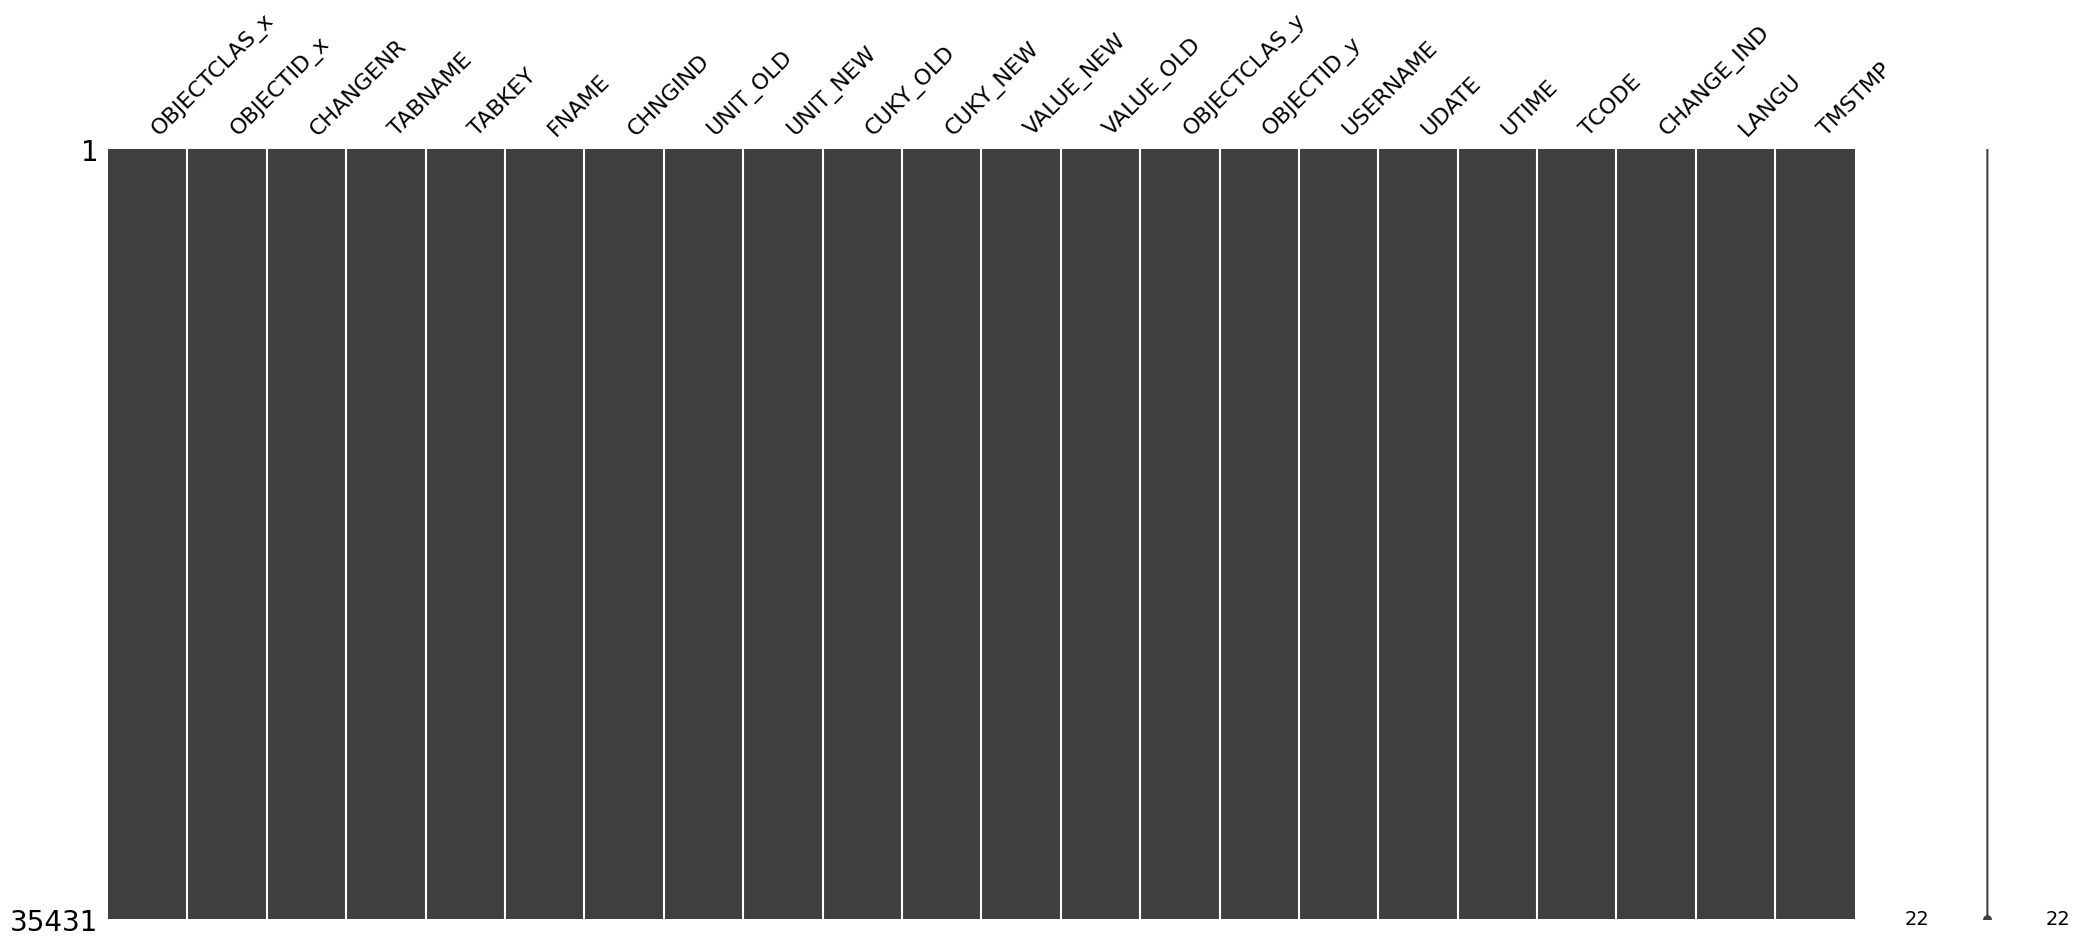

In [33]:
import missingno as msno
%matplotlib inline
msno.matrix(df_cor)

In [34]:
df_cor.to_feather('../Data/D3_CDHDR-CDPOS_raw.ftr')